# Improving our decision tree

The goal of this notebook is to talk about decision trees and see how can we tune them to improve their performance.


In [ ]:
import pandas as pd

housing = pd.read_csv('housing-classification-iter3.csv')
housing.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
0,8450,65.0,856,3,0,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc
1,9600,80.0,1262,3,1,0,2,298,0,0,RL,Feedr,GasA,Pave,Y,CBlock
2,11250,68.0,920,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,PConc
3,9550,60.0,756,3,1,0,3,0,0,0,RL,Norm,GasA,Pave,Y,BrkTil
4,14260,84.0,1145,4,1,0,3,192,0,0,RL,Norm,GasA,Pave,Y,PConc


In [ ]:
housing.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
Expensive         0
MSZoning          0
Condition1        0
Heating           0
Street            0
CentralAir        0
Foundation        0
dtype: int64

In [ ]:
housing.nunique()

LotArea         1073
LotFrontage      110
TotalBsmtSF      721
BedroomAbvGr       8
Fireplaces         4
PoolArea           8
GarageCars         5
WoodDeckSF       274
ScreenPorch       76
Expensive          2
MSZoning           5
Condition1         9
Heating            6
Street             2
CentralAir         2
Foundation         6
dtype: int64

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
 10  MSZoning      1460 non-null   object 
 11  Condition1    1460 non-null   object 
 12  Heating       1460 non-null   object 
 13  Street        1460 non-null   object 
 14  CentralAir    1460 non-null   object 
 15  Foundation    1460 non-null   object 
dtypes: float64(1), int64(9), object(6)
memory usage: 182.6+ KB


## Create train and test



How can you split the data into train and test sets?

In [ ]:
# create train and test -iter-6(scikit-learn pipeline)
from sklearn.model_selection import train_test_split

X = housing.drop(columns=['TotalBsmtSF','PoolArea','Expensive','LotFrontage','Condition1','CentralAir','BedroomAbvGr'])
y = housing['Expensive']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=8)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train.head()

,LotArea,Fireplaces,GarageCars,WoodDeckSF,ScreenPorch,MSZoning,Heating,Street,Foundation
703,7630,1,2,344,0,RM,GasA,Pave,BrkTil
1207,9135,0,2,192,0,RL,GasA,Pave,PConc
779,10530,0,2,0,0,RL,GasA,Pave,CBlock
441,12108,0,0,0,0,RL,GasA,Pave,CBlock
249,159000,2,2,0,0,RL,GasA,Pave,CBlock


## Preprocess the data

Is there any pre pre processing that needs to be applied to the numerical columns?

In [ ]:
 #Preprocess -6 build our first sklean pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# creating the sklearn piplines

# numeric columns
numerical_pipeline = Pipeline(
    steps=[('impute', SimpleImputer(strategy='median')),
           ('scale', MinMaxScaler())])

# categorical columns
categorical_pipeline = Pipeline(
    steps=[('impute', SimpleImputer(strategy='most_frequent')),
           ('one-hot', OneHotEncoder(drop='first', sparse=False))])

In [ ]:
num_col =['LotArea','Fireplaces','GarageCars','WoodDeckSF','ScreenPorch']
cat_col = ['MSZoning',	'Heating',	'Street'	,'Foundation']

pd.DataFrame(categorical_pipeline.fit_transform(X_train[cat_col]))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1091,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1092,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1093,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
from sklearn.compose import ColumnTransformer

# apply ColumnTransformers to combine different Pipeline
full_processor = ColumnTransformer(
    transformers=[
                  ('number', numerical_pipeline, num_col), 
                  ('category', categorical_pipeline, cat_col)     
    ]
)

pd.DataFrame(full_processor.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.028784,0.333333,0.50,0.467391,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.035824,0.000000,0.50,0.260870,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.042350,0.000000,0.50,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.049731,0.000000,0.00,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.736888,0.666667,0.50,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.017931,0.000000,0.25,0.535326,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1091,0.025149,0.000000,0.50,0.260870,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1092,0.035866,0.000000,0.25,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1093,0.007967,0.000000,0.50,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


And to the categorical columns?

Is there any way to combine the pre processing done to categorical and numerical data?

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# adding a model into our pipeline
tree_pipeline = Pipeline(
    steps=[
           ('preprocess', full_processor),
           ('model', DecisionTreeClassifier())
    ]
)

tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['LotArea', 'Fireplaces',
                                                   'GarageCars', 'WoodDeckSF',
                                                   'ScreenPorch']),
                                                 ('category',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                   

In [ ]:
from sklearn.compose import ColumnTransformer

# apply ColumnTransformers to combine different Pipeline
full_processor = ColumnTransformer(
    transformers=[
                  ('number', numerical_pipeline, num_col), 
                  ('category', categorical_pipeline, cat_col)     
    ]
)

pd.DataFrame(full_processor.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.028784,0.333333,0.50,0.467391,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.035824,0.000000,0.50,0.260870,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.042350,0.000000,0.50,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.049731,0.000000,0.00,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.736888,0.666667,0.50,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.017931,0.000000,0.25,0.535326,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1091,0.025149,0.000000,0.50,0.260870,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1092,0.035866,0.000000,0.25,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1093,0.007967,0.000000,0.50,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
tree_pipeline.predict(X_test)

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

Test sklearn pipline

In [ ]:
from sklearn.metrics import accuracy_score

# accuracy for train data
accuracy_score(tree_pipeline.predict(X_train), y_train)

0.9990867579908675

In [ ]:
# accuracy test data
preds = tree_pipeline.predict(X_test)
acc_6th = accuracy_score(preds, y_test)
acc_6th

0.8767123287671232

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


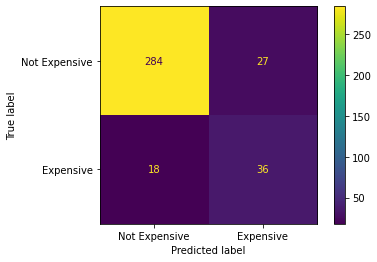

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# plot confusion matrix
plot_confusion_matrix(
    tree_pipeline, 
    X_test, y_test, 
    display_labels=['Not Expensive', 'Expensive']
    );

 Manual model tunning -7th

In [ ]:
# numerical and categorical pipeline
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler())
])
categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(drop='first', sparse=False))
])
pd.DataFrame(categorical_pipeline.fit_transform(X_train[cat_col]))
pd.DataFrame(categorical_pipeline.fit_transform(X_train[num_col]))

# automating the column selection
cat_col = ['LotArea','Fireplaces','GarageCars','WoodDeckSF','ScreenPorch']
num_col =  ['MSZoning',	'Heating',	'Street'	,'Foundation']
full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, num_col), 
    ('category', categorical_pipeline, cat_col)
])



**Tunning our model**

In [ ]:
# adding the model in our pipeline
tree_pipeline = Pipeline(steps=[
    ('preprocess', full_processor), 
    ('model', DecisionTreeClassifier(max_depth=4))
])
# fit our model to the train
tree_pipeline.fit(X_train, y_train)
accuracy_score(tree_pipeline.predict(X_train), y_train)

0.9260273972602739

In [ ]:
# fit our model to the train
tree_pipeline.fit(X_train, y_train)
accuracy_score(tree_pipeline.predict(X_train), y_train)

0.9260273972602739

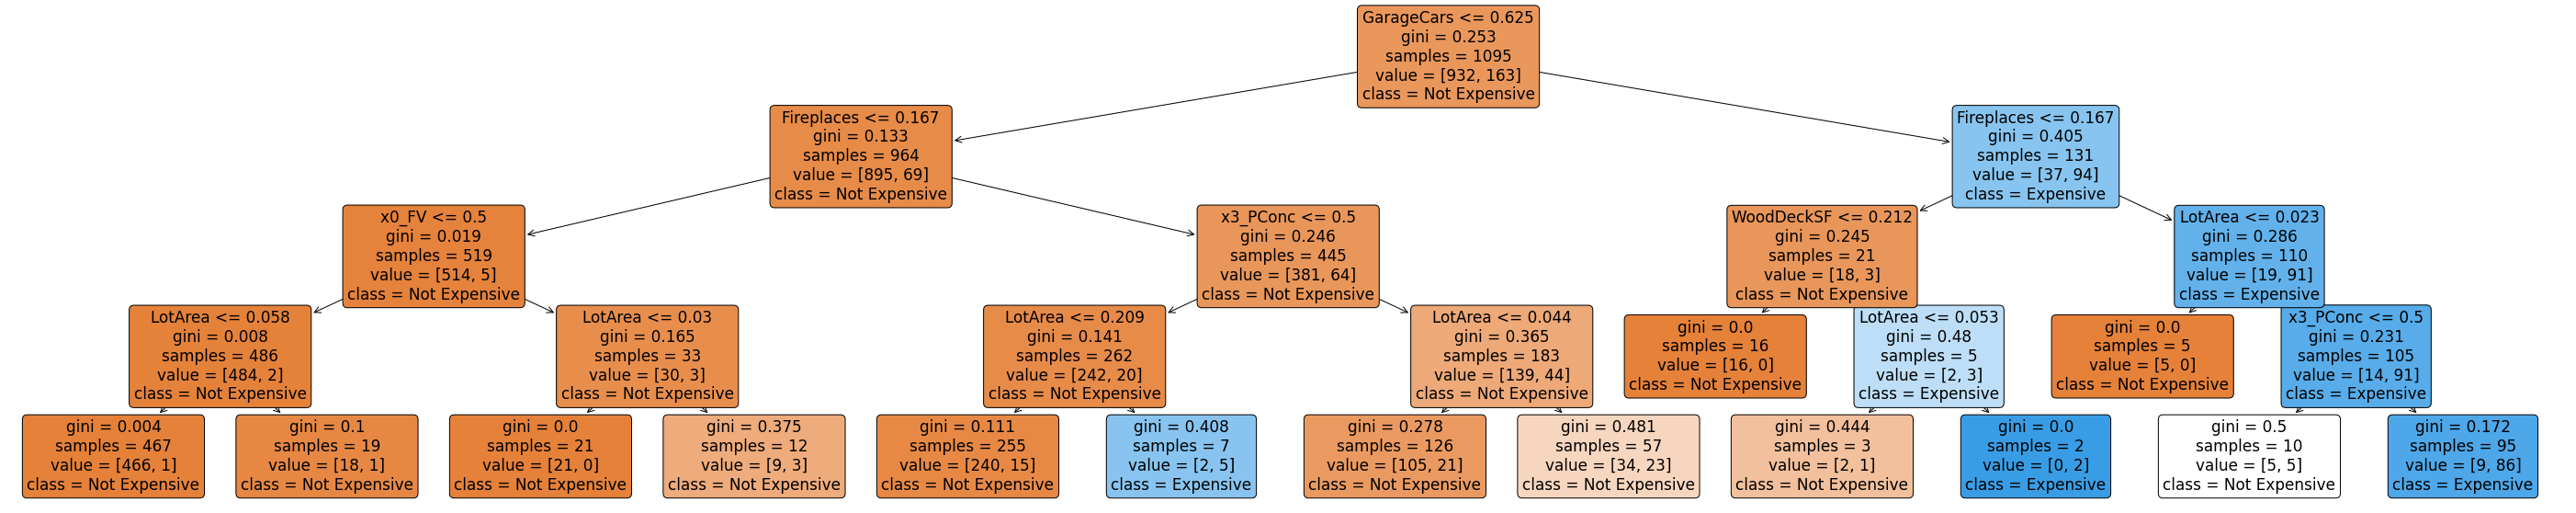

In [ ]:
 #plot our model

# get column names
col_names = num_col.copy()
col_names.extend(
    tree_pipeline.named_steps['preprocess'].transformers_[1][1].named_steps['one-hot'].get_feature_names_out()
)

# plot
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(50, 10))
plot_tree(
    tree_pipeline['model'],
    filled=True, 
    rounded=True, 
    feature_names=col_names, 
    class_names=['Not Expensive', 'Expensive']
    );

Test-7th

In [ ]:
preds = tree_pipeline.predict(X_test)
acc_7th = accuracy_score(preds, y_test)
acc_7th

0.9041095890410958

## Train your model

Can you train a model into the same pre process pipeline?

In [ ]:
#8th iteration: Auto model tunning + Cross Validation
# numerical and categorical pipeline
numeric_pipeline = Pipeline(steps=[
    ('num_impute', SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler())
])
categorical_pipeline = Pipeline(steps=[
    ('cat_impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(drop='first', sparse=False))
])
# automating the column selection
cat_col = ['LotArea','Fireplaces','GarageCars','WoodDeckSF','ScreenPorch']
num_col =  ['MSZoning',	'Heating',	'Street'	,'Foundation']
full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, num_col), 
    ('category', categorical_pipeline, cat_col)
])

# adding the model in our pipeline
tree_pipeline = Pipeline(steps=[
    ('preprocess', full_processor), 
    ('model', DecisionTreeClassifier())
])

0.9272260273972602

Can you automate the search of better parameters for a Decision tree? 

Take a look at this article on the [platform](https://platform.wbscodingschool.com/courses/data-science/14418/).

In [ ]:
# automating the search of the different parameters for our model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__max_depth': range(3, 8),
    'model__min_samples_leaf': range(5, 10),
    'model__min_samples_split': range(6, 10),
    'model__criterion':['gini','entropy']
    }

# fit our model to the train
search = GridSearchCV(
    tree_pipeline, 
    param_grid, 
    cv=4, 
    scoring='accuracy',
    verbose=1, 
    refit=True,
    n_jobs=-1
)

_ = search.fit(X_train, y_train)

Fitting 4 folds for each of 200 candidates, totalling 800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  category=UserWarning,


In [ ]:
search.best_params_

{'model__criterion': 'gini',
 'model__max_depth': 3,
 'model__min_samples_leaf': 5,
 'model__min_samples_split': 6}

In [ ]:
accuracy_score(search.predict(X_train), y_train)

0.9223744292237442

In [ ]:
acc_8th = accuracy_score(search.predict(X_test), y_test)
acc_8th

0.9068493150684932

How does your tree look like? (Plot it)

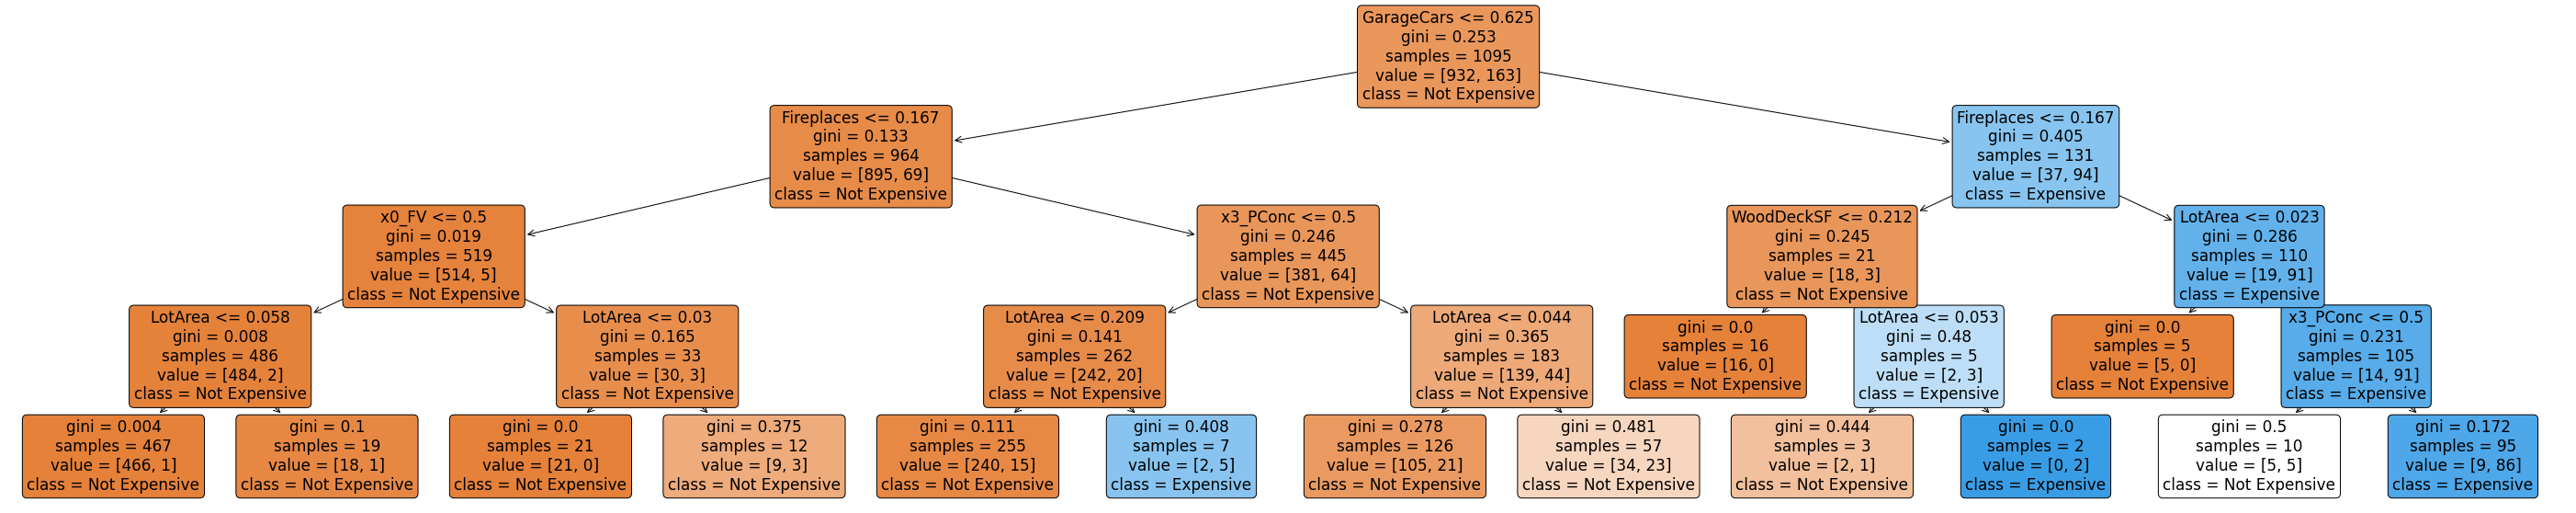

In [ ]:
# plot our model

# get column names
col_names = num_col.copy()
col_names.extend(
    tree_pipeline.named_steps['preprocess'].transformers_[1][1].named_steps['one-hot'].get_feature_names_out()
)

# plot
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(50, 10))
plot_tree(
    tree_pipeline['model'],
    filled=True, 
    rounded=True, 
    feature_names=col_names, 
    class_names=['Not Expensive', 'Expensive']
    );

In [ ]:

X = housing.drop(columns=['TotalBsmtSF','PoolArea','Expensive','LotFrontage','Condition1','CentralAir','BedroomAbvGr'])
y = housing['Expensive']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train.sample(10)

,LotArea,Fireplaces,GarageCars,WoodDeckSF,ScreenPorch,MSZoning,Heating,Street,Foundation
1069,9600,0,2,0,0,RL,GasA,Pave,CBlock
1318,14781,1,3,198,0,RL,GasA,Pave,PConc
547,7244,0,2,104,0,RL,GasA,Pave,CBlock
1099,11880,1,2,0,0,RL,GasA,Pave,CBlock
1274,5362,1,2,242,0,RL,GasA,Pave,PConc
1172,4017,0,2,0,0,FV,GasA,Pave,PConc
135,10400,1,2,98,0,RL,GasA,Pave,PConc
1445,8400,0,1,0,0,RL,GasA,Pave,CBlock
172,5306,1,2,441,0,RL,GasA,Pave,PConc
1339,9560,0,1,0,0,RL,GasA,Pave,CBlock


## Apply your model

How can you compare the performance of your model between train and test? (Use the pipeline you created)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

X = housing.drop(columns=['TotalBsmtSF','PoolArea','Expensive','LotFrontage','Condition1','CentralAir','BedroomAbvGr'])
y = housing['Expensive']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.1)



In [18]:
# price model
acc_2nd = 0.82

# decision tree with 1 feature - Fireplaces
acc_3rd = 0.85

# overfitted tree
acc_4th = 0.83

# manual tunning tree (max_depth = 3)
acc_5th = 0.92

#1st sk pipeline
acc_6th = 0.89

#manual_model
acc_7th = 0.84

#auto model
acc_8th = 0.90


Text(0.5, 1.0, 'Accuracy evolution through iterations')

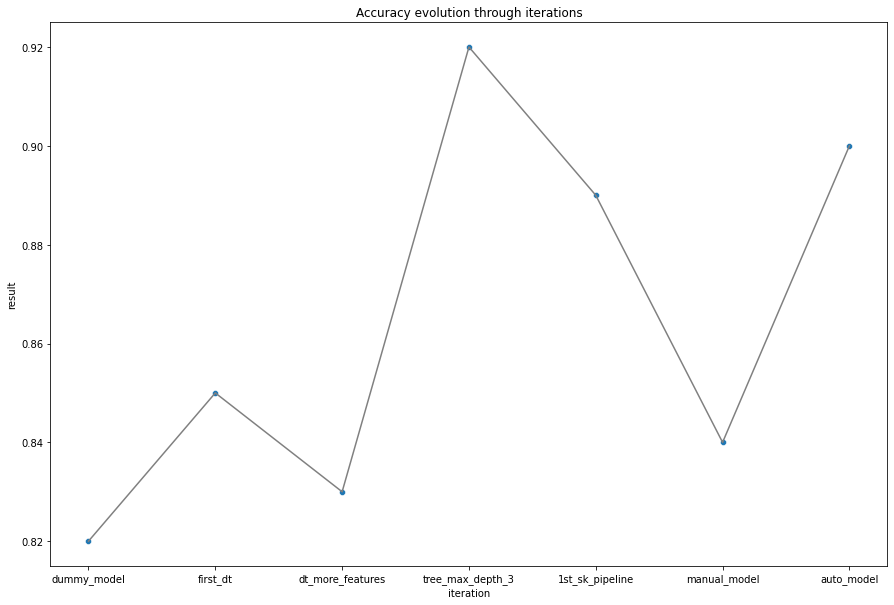

In [19]:
import seaborn as sns
# our we improving our model?
plt.subplots(figsize=(15, 10))


# ax = plt.axes()
results = {
    'dummy_model':acc_2nd, 
    'first_dt':acc_3rd, 
    'dt_more_features':acc_4th, 
    'tree_max_depth_3':acc_5th,
    '1st_sk_pipeline':acc_6th,
    'manual_model':acc_7th,
    'auto_model':acc_8th

}

results_df = pd.DataFrame({
    'iteration':results.keys(),
    'result':results.values()
})
sns.lineplot(data=results_df, x='iteration', y='result', color='grey')
sns.scatterplot(data=results_df, x='iteration', y='result')
plt.title('Accuracy evolution through iterations')